Olá, Renan!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

    Olá Luiz, muito obrigado pelo tempo tomado para corrigir meu projeto, suas considerações ao longo dele fizeram eu entender melhor onde eu estava errando em alguns pontos. Espero ter corrigido tudo de acordo, mas caso algo não esteja certo peço que me encaminhe novamente.
</div>


# Projeto Sprint 10

<b>Descrição dos dados</b>

    Cada entrada de diário é uma ação do usuário ou um evento.
        EventName — nome do evento
        DeviceIDHash — dentificador de usuário exclusivo
        EventTimestamp — hora do evento
        ExpId — número do experimento: 246 e 247 são os grupos de controle, 248 é o grupo de teste

 ## Passo 1. Abra o arquivo de dados e leia a informação geral

In [1]:
#importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as py
import seaborn as sns
import datetime as datetime
from scipy import stats as st
import numpy as np


In [2]:
#importando o conjunto de dados para o arquivo logs
logs = pd.read_csv('logs_exp_us.csv', sep='\t') #necessário colocar o separador dos dados como '\t'

In [3]:
print(logs.head())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


## Passo 2

<b> 2.1 Renomeando as colunas

Como são poucas colunas posso trocar uma por uma pois quero adicionar o '_' entre as palavras. Outra forma seria utilizando um ciclo 'for' para tratar todas as palavras como minusculas e remover possíveis espaços ao final ou inicio das colunas (caso houvesse).

In [4]:
logs = logs.rename(columns={'EventName': 'event_name',
                            'DeviceIDHash':'device_id_hash',
                            'EventTimestamp':'event_time_stamp',
                            'ExpId':'exp_id'})

print(logs.columns)

Index(['event_name', 'device_id_hash', 'event_time_stamp', 'exp_id'], dtype='object')


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O seu código está correto, mas imagine se o conjunto de dados tivesse muitas colunas. Pense em como você pode fazer essa transformação programaticamente.
</div>

<b> 2.2 Verificando os dados se há valores ausentes

In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   event_name        244126 non-null  object
 1   device_id_hash    244126 non-null  int64 
 2   event_time_stamp  244126 non-null  int64 
 3   exp_id            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


    É possível observar que não há valores ausentes entre os dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os conjuntos de dados foram carregados e estudados corretamente usando os métodos `head()` e `info()`. A presença de dados ausentes foi verificada.
</div>

<b> 2.3 Adicione uma coluna de data e hora e uma coluna separada para datas

In [6]:
#adicionando a coluna de data e hora
logs['date_time'] = pd.to_datetime(logs['event_time_stamp'], unit='s', errors='coerce') #os dados de data estão no formato de segundos, por isso unit='s'

In [7]:
#adicionando a coluna de data
logs['date'] = logs['date_time'].dt.date #para a data
logs['time'] = logs['date_time'].dt.time #para as horas

In [8]:
print(logs.columns)

Index(['event_name', 'device_id_hash', 'event_time_stamp', 'exp_id',
       'date_time', 'date', 'time'],
      dtype='object')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As colunas de `data` e `hora` foram adicionadas.
</div>

## Passo 3

<b> 3.1 Quantos eventos ficam nos diários?

In [9]:
print('Os eventos que ficam nos diários são:')
print(logs['event_name'].value_counts())

print()
print("Assim, o total de eventos dos diários é:")
print(logs['event_name'].nunique())

Os eventos que ficam nos diários são:
event_name
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

Assim, o total de eventos dos diários é:
5


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

In [10]:
#substituir os valores da coluna 'event_name' para melhor entendimento

logs['event_name'] = logs['event_name'].replace({
    'MainScreenAppear': 'Main Screen Appear',
    'OffersScreenAppear': 'Offers Screen Appear',
    'CartScreenAppear': 'Cart Screen Appear',
    'PaymentScreenSuccessful': 'Payment Screen Successful',
    'Tutorial': 'Tutorial'
})

print(logs['event_name'].value_counts())

event_name
Main Screen Appear           119205
Offers Screen Appear          46825
Cart Screen Appear            42731
Payment Screen Successful     34313
Tutorial                       1052
Name: count, dtype: int64


<b>3.2 Quantos usuários ficam no diário?

In [11]:
#atribundo o valor total de usuários presentes no diário a uma variável
users_count = logs['device_id_hash'].nunique()

print(f"No diário ficam {users_count} usuários registrados")

No diário ficam 7551 usuários registrados


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

<b> 3.3 Qual é o número médio de eventos por usuário?

In [95]:
#agrupar os dados de usuários

average_orders = logs.groupby('device_id_hash')['event_name'].count().mean()

#arredondar valores para duas casas decimais.
average_orders = round(average_orders, 2)

print(f"Em média, cada usuário tem {average_orders} eventos.")

Em média, cada usuário tem 32.33 eventos.


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sugestão: 
    
```python
    avg_events = unique_events / unique_users
```
</div>

<b> 3.4 Qual é o período de tempo que os dados cobrem? Encontre a data máxima e mínima. Desenhe um histograma por data e hora. Você pode ter certeza de que possui os dados igualmente completos para todo o período? Os eventos mais antigos podem acabar aparecendo nos diários de alguns usuários por motivos técnicos, e isso pode distorcer o quadro geral. Encontre o momento em que os dados começam a ser completos e ignore a seção anterior. Qual período os dados realmente representam?

In [13]:
#Encontrando a data maxima e mínima

max_date = logs['date'].max()

min_date = logs['date'].min()

difference = max_date - min_date

difference = difference.days #me dá o valor em dias.


print(f"A menor data do conjunto de dados é em {min_date}, enquanto a maior data ocorreu em {max_date}, isso nos dá um período de {difference} dias entre os dados.")

A menor data do conjunto de dados é em 2019-07-25, enquanto a maior data ocorreu em 2019-08-07, isso nos dá um período de 13 dias entre os dados.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

In [14]:
print(logs.columns)

Index(['event_name', 'device_id_hash', 'event_time_stamp', 'exp_id',
       'date_time', 'date', 'time'],
      dtype='object')


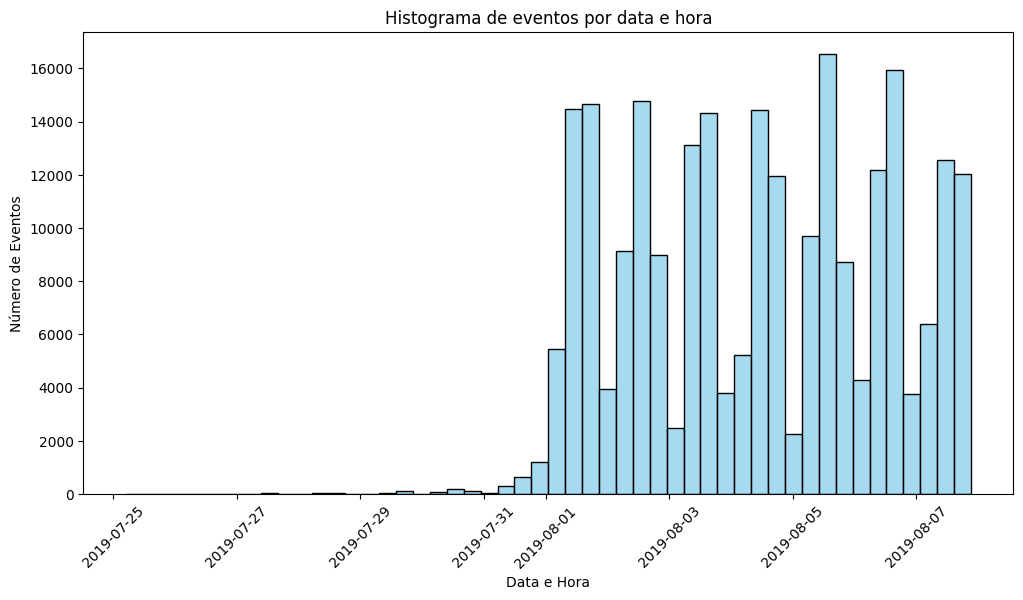

In [15]:
#desenhar um histograma para os dados

plt.figure(figsize=(12, 6))
sns.histplot(logs['date_time'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.title('Histograma de eventos por data e hora')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

In [16]:
print(logs['date'].value_counts())

date
2019-08-01    36229
2019-08-05    36113
2019-08-06    35822
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-07    31144
2019-07-31     2031
2019-07-30      413
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: count, dtype: int64


Com base nos dados oriundos do histograma e da contagem de observações por dia, podemos observar que apenas apartir de 07-08-2019 temos registros de mais de 30 mil eventos.

O interessante seria remover esses dados do conjunto para avaliação.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, boa análise!
</div>

In [17]:
# Converter a string para datetime
logs['date'] = pd.to_datetime(logs['date'])


In [18]:
# Criar uma lista com as datas para serem removidas
dates_to_remove = ['2019-07-31', '2019-07-30', '2019-07-29', '2019-07-28', '2019-07-27', '2019-07-26', '2019-07-25']

#filtrar os dados com base na lista
logs_updated = logs[~logs['date'].isin(dates_to_remove)] #o ~ da a negativa, ou seja, vai me dar os dados que não estão no conjunto de datas fornecidas

logs_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241298 entries, 2828 to 244125
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        241298 non-null  object        
 1   device_id_hash    241298 non-null  int64         
 2   event_time_stamp  241298 non-null  int64         
 3   exp_id            241298 non-null  int64         
 4   date_time         241298 non-null  datetime64[ns]
 5   date              241298 non-null  datetime64[ns]
 6   time              241298 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 14.7+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os eventos de logs foram filtrados no conjunto de dados.
</div>

In [19]:
#imprimir o novo resultado para conferiri
print(logs_updated['date'].value_counts())

date
2019-08-01    36229
2019-08-05    36113
2019-08-06    35822
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-07    31144
Name: count, dtype: int64


In [20]:
#Encontrando a nova data maxima e mínima dos dados filtrados

max_date_filtered = logs_updated['date'].max()

min_date_filtered = logs_updated['date'].min()

difference = max_date_filtered - min_date_filtered

difference = difference.days #me dá o valor em dias.


print(f"A menor data do conjunto de dados é em {min_date_filtered}, enquanto a maior data ocorreu em {max_date_filtered}, isso nos dá um período de {difference} dias entre os dados.")

A menor data do conjunto de dados é em 2019-08-01 00:00:00, enquanto a maior data ocorreu em 2019-08-07 00:00:00, isso nos dá um período de 6 dias entre os dados.


<b> 3.5 Você perdeu muitos eventos e usuários ao excluir os dados mais antigos?

In [21]:
#dados antes de filtrar
event_before_filter = logs['event_name'].count()

#dados depois de remover datas com poucas informações
event_after_filter = logs_updated['event_name'].count()

difference_events = event_before_filter - event_after_filter

participation_total = difference_events/event_before_filter*100

participation_total = round(participation_total, 2)

print(f'Após a transformação dos dados foram perdidos {difference_events} eventos, o que nos da uma perca de {participation_total}% dos dados.')

Após a transformação dos dados foram perdidos 2828 eventos, o que nos da uma perca de 1.16% dos dados.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A proporção de eventos descartados foi calculada para o conjunto de dados de eventos.
</div>

<b> 3.6 Certifique-se de ter usuários de todos os três grupos experimentais

In [22]:
print(logs_updated['exp_id'].value_counts())

exp_id
248    84726
246    79425
247    77147
Name: count, dtype: int64


    É possível observar que mesmo após a remoção das datas com menos dados nós ainda emos informações nos três grupos experimentais.

## Passo 4

<b> 4.1 Veja quais eventos estão nos diários e sua frequência de ocorrência. Classifique-os por frequência.

In [23]:
event_frequency = logs_updated['event_name'].value_counts()

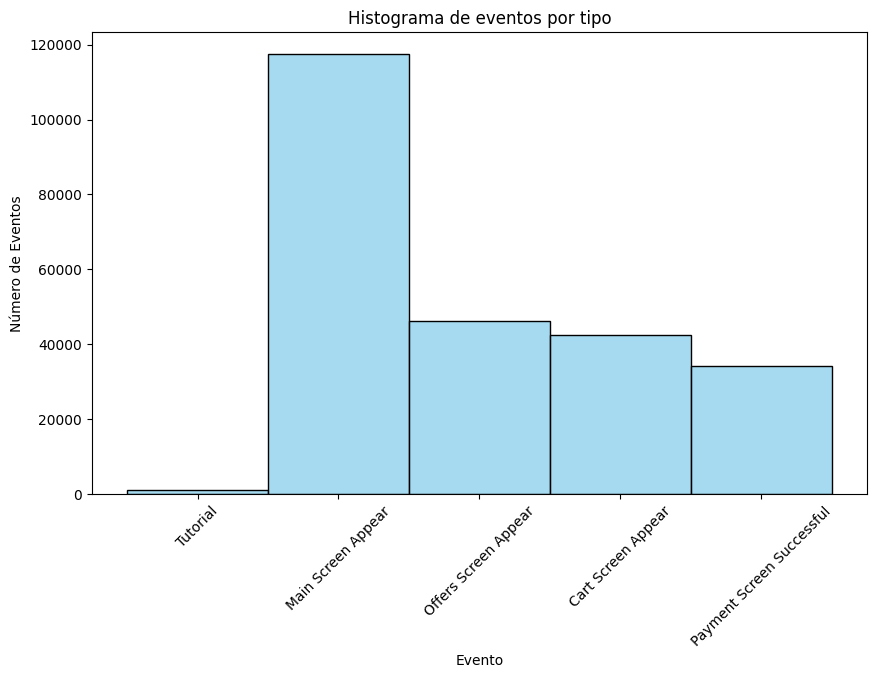

In [24]:
#plotar o histograma dos eventos
plt.figure(figsize=(10, 6))
sns.histplot(logs_updated['event_name'], kde=False, color='skyblue', edgecolor='black')
plt.title('Histograma de eventos por tipo')
plt.xlabel('Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A quantidade de eventos por tipo foi calculada.
</div>

<b> 4.2 Encontre o número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez.

In [25]:
#agrupar os eventos realizados pelos usuários
users_per_event = logs_updated.groupby('event_name')['device_id_hash'].count()

#ordenar os dados
users_per_event = users_per_event.sort_values(ascending=False)
print(users_per_event)

event_name
Main Screen Appear           117431
Offers Screen Appear          46350
Cart Screen Appear            42365
Payment Screen Successful     34113
Tutorial                       1039
Name: device_id_hash, dtype: int64


<b> 4.2.1 calcular a proporção de usuários que executaram a ação pelo menos uma vez

In [26]:
#contar os usuários unicos por evento
unique_users_event = logs_updated.groupby('event_name')['device_id_hash'].nunique()

print(unique_users_event)

event_name
Cart Screen Appear           3734
Main Screen Appear           7419
Offers Screen Appear         4593
Payment Screen Successful    3539
Tutorial                      840
Name: device_id_hash, dtype: int64


In [27]:
#contar o total de usuários únicos para calcular a proporção
total_unique_users = logs_updated['device_id_hash'].nunique()

print(total_unique_users)

7534


In [28]:
#calculando a proporção de usuários por evento
proportion_users_per_event = unique_users_event / total_unique_users * 100

#ordenar do maior para o menor
proportion_users_per_event = proportion_users_per_event.sort_values(ascending=True)

#arredondar para duas casas decimais
proportion_users_per_event = proportion_users_per_event.round(2)

print(proportion_users_per_event)

event_name
Tutorial                     11.15
Payment Screen Successful    46.97
Cart Screen Appear           49.56
Offers Screen Appear         60.96
Main Screen Appear           98.47
Name: device_id_hash, dtype: float64


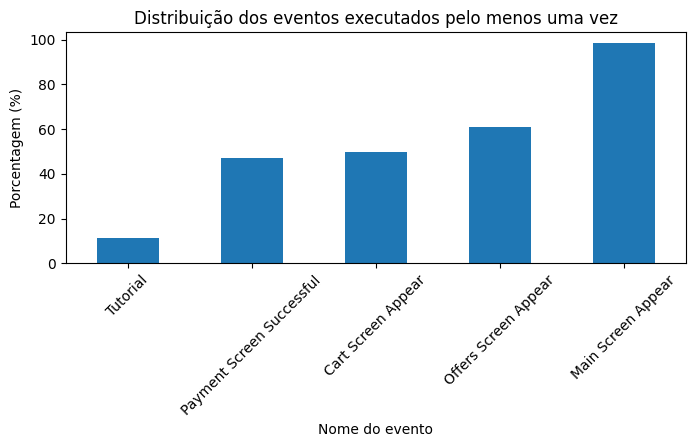

In [66]:
#plotando os dados
plt.figure(figsize=[8,3])
proportion_users_per_event.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Distribuição dos eventos executados pelo menos uma vez')
plt.ylabel("Porcentagem (%)")
plt.xlabel("Nome do evento")
plt.show()

    Conforme observado, o tutorial foi o evento menos realizado pelos usuários.

    98,47% dos usuários viram a tela principal, mas apenas 60,96% viram a tela de ofertas aparecer. 49,56% foram para a janela do carrinho e 46,97% foram para a janela de pagamento.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A proporção de usuários por etapa do funil de eventos foi calculada. Sugestão: poderia adicionar uma label próximo a cada barra do gráfico indicando o percentual.
</div>

<b> 4.3 Em que ordem você acha que as ações ocorreram. Todos eles fazem parte de uma única sequência? Você não precisa levá-los em consideração ao calcular o funil.

    Acredito que a ordem nesse caso se deu como: 'Main Screen Appear' > 'Offers Screen Appear' > 'Cart Screen Appear' > 'Payment Screen Successful'.

    O 'Tutorial' pode ter aparecido para os usuários logo após a tela principal, mas a grande maioria não escolheu realiza-lo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boa análise. Uma alternativa também pode ser que a tela `Tutorial` só aparece para um grupo de usuários específicos (usuários novos, por exemplo).
</div>

<b> 4.4 Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima. (Por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B.)

In [30]:
#Como considero o 'Tutorial' não integrante do funil de eventos nesse caso, vou atribuir cada um dos eventos a uma variável e calcular a taxa de conversão.

# Definir os eventos A, B, C, D na ordem: 'Main Screen Appear' > 'Offers Screen Appear' > 'Cart Screen Appear' > 'Payment Screen Successful'.
event_A = 'Main Screen Appear'
event_B = 'Offers Screen Appear'
event_C = 'Cart Screen Appear'
event_D = 'Payment Screen Successful'

#Atribuir os usuarios unicos de cada evento à uma variável
unique_users_A = logs_updated[logs_updated['event_name'] == event_A]['device_id_hash'].nunique()
unique_users_B = logs_updated[logs_updated['event_name'] == event_B]['device_id_hash'].nunique()
unique_users_C = logs_updated[logs_updated['event_name'] == event_C]['device_id_hash'].nunique()
unique_users_D = logs_updated[logs_updated['event_name'] == event_D]['device_id_hash'].nunique()

#Calcular a taxa de conversão pela divisão de um evento pelo outro
conversion_rate_A_to_B = unique_users_B / unique_users_A
conversion_rate_B_to_C = unique_users_C / unique_users_B
conversion_rate_C_to_D = unique_users_D / unique_users_C
conversion_rate_A_to_D = unique_users_D / unique_users_A #para ver quanto se converte em venda

# Imprimir as taxas de conversão
print(f'Taxa de conversão de {event_A} para {event_B}: {conversion_rate_A_to_B:.2%}')
print(f'Taxa de conversão de {event_B} para {event_C}: {conversion_rate_B_to_C:.2%}')
print(f'Taxa de conversão de {event_C} para {event_D}: {conversion_rate_C_to_D:.2%}')
print(f'Taxa de conversão de {event_A} para {event_D}: {conversion_rate_A_to_D:.2%}')

Taxa de conversão de Main Screen Appear para Offers Screen Appear: 61.91%
Taxa de conversão de Offers Screen Appear para Cart Screen Appear: 81.30%
Taxa de conversão de Cart Screen Appear para Payment Screen Successful: 94.78%
Taxa de conversão de Main Screen Appear para Payment Screen Successful: 47.70%


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas pense em como você poderia criar uma função para simplificar e reaproveitar esse código.
</div>

<b> 4.5 Em qual fase você perde mais usuários?

    A maior perda de usuários ocorre entre a tela inicial (Main Screen Appear) e o aparecimento da janela de ofertas (Offers Screen Appear).

<b> 4.6 Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?

    47,70% dos usuários faz o caminho inteiro desde a tela inicial até o pagamento do produto.

## Passo 5

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>

<b>5.1 Quantos usuários há em cada grupo?

In [31]:
print(logs_updated.columns) #para me ajudar a lembrar o nome das colunas

Index(['event_name', 'device_id_hash', 'event_time_stamp', 'exp_id',
       'date_time', 'date', 'time'],
      dtype='object')


In [32]:
#agrupar o total de usuários unicos por grupo do experimento (246, 247 e 248)
user_per_group = logs_updated.groupby('exp_id')['device_id_hash'].nunique()

print(user_per_group)
print()
mean_users = user_per_group.mean().round(2)
print(f'Em média, nós temos {mean_users} usuarios por grupo.')

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

Em média, nós temos 2511.33 usuarios por grupo.


    O grupo 248 possui o maior número de usuários (2537) e em média são 2511,33 usuários por grupo ao trabalhar com os dados cujas datas com pouca informação foram removidas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

<b> 5.2 Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.

In [33]:
#Separando os dados para as amostras 246 e 247

sample_A_246 = logs_updated[logs_updated['exp_id'] == 246]['device_id_hash']

sample_B_247 = logs_updated[logs_updated['exp_id'] == 247]['device_id_hash']

results = st.ttest_ind(sample_A_246, sample_B_247, equal_var=False)

alpha = 0.05

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")


Existe diferença entre os grupos.

O valor de p é: 8.186318588630476e-26


<b> 5.3 Selecione o evento mais popular. Em cada um dos grupos de controle, encontre o número de usuários que realizaram essa ação. Encontre a proporção deles. Verifique se a diferença entre os grupos é estatisticamente significativa. Repita o procedimento para todos os outros eventos (economizará tempo se você criar uma função especial para este teste). Você pode confirmar se os grupos foram divididos corretamente?

In [34]:
#filtrar os dados por experimento 
group_246 = logs_updated[logs_updated['exp_id'] == 246]
group_247 = logs_updated[logs_updated['exp_id'] == 247]
group_248 = logs_updated[logs_updated['exp_id'] == 248]

In [35]:
#encontrar o evento mais popular em cada grupo

#grupo 246
group_246_event = group_246.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=True)
print('Ordem de popularidade dos eventos para os usuários do grupo 246')
print(group_246_event)

print()
#grupo 247
group_247_event = group_247.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=True)
print('Ordem de popularidade dos eventos para os usuários do grupo 247')
print(group_247_event)

print()
#grupo 248
group_248_event = group_248.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=True)
print('Ordem de popularidade dos eventos para os usuários do grupo 248')
print(group_248_event)

print()

Ordem de popularidade dos eventos para os usuários do grupo 246
event_name
Tutorial                      278
Payment Screen Successful    1200
Cart Screen Appear           1266
Offers Screen Appear         1542
Main Screen Appear           2450
Name: device_id_hash, dtype: int64

Ordem de popularidade dos eventos para os usuários do grupo 247
event_name
Tutorial                      283
Payment Screen Successful    1158
Cart Screen Appear           1238
Offers Screen Appear         1520
Main Screen Appear           2476
Name: device_id_hash, dtype: int64

Ordem de popularidade dos eventos para os usuários do grupo 248
event_name
Tutorial                      279
Payment Screen Successful    1181
Cart Screen Appear           1230
Offers Screen Appear         1531
Main Screen Appear           2493
Name: device_id_hash, dtype: int64



    Pude observar que o evento mais popular entre os usuários é o aparecimento da tela principal (Main Screen Appear). Vou filtrar os dados para que apenas esse evento apareça nos próximos grupos e realizar novamente os testes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>

<b>5.3.1 Encontrar a proporção de usuários para cada grupo

In [36]:
#contar os usuários unicos por grupo
unique_users_group = logs_updated.groupby('exp_id')['device_id_hash'].nunique()

print(unique_users_group)

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


In [37]:
#contar o total de usuários únicos para calcular a proporção
total_unique_users = logs_updated['device_id_hash'].nunique()

print(total_unique_users)

7534


In [38]:
#calculando a proporção de usuários por evento
proportion_users_per_group = unique_users_group / total_unique_users * 100

#ordenar do maior para o menor
proportion_users_per_group = proportion_users_per_group.sort_values(ascending=True)

#arredondar para duas casas decimais
proportion_users_per_group = proportion_users_per_group.round(2)

print(proportion_users_per_group)

exp_id
246    32.97
247    33.36
248    33.67
Name: device_id_hash, dtype: float64


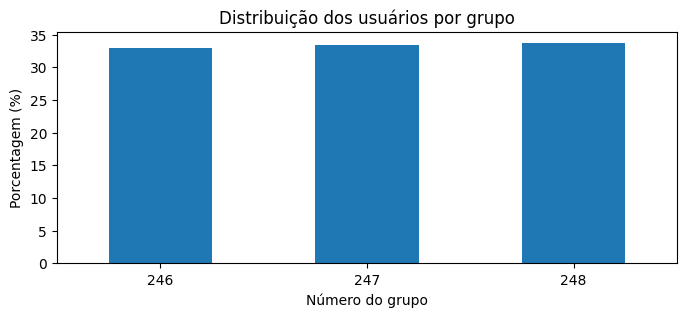

In [39]:
#plotando os dados
plt.figure(figsize=[8,3])
proportion_users_per_group.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distribuição dos usuários por grupo')
plt.ylabel("Porcentagem (%)")
plt.xlabel("Número do grupo")
plt.show()

    É possível observar que os os usuários estão bem divididos, com cerca de 33% dos usuários em cada grupo.

<b>5.3.2 Verifique se a diferença entre os grupos é estatisticamente significativa

In [71]:
#filtrar os dados onde evento é 'Main Screen Appear'

group_246_event_filtered = group_246.groupby('event_name')['device_id_hash'].count()
group_247_event_filtered = group_247.groupby('event_name')['device_id_hash'].count()
group_248_event_filtered = group_248.groupby('event_name')['device_id_hash'].count()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você está filtrando o `hash` de cada evento no conjunto de dados e esse dado é usado na execução do teste de significância. Como o hash é um valor único, repare que todos os seus testes deram diferença significativa, até com intervalo de confiaça alto (`< 0.1`). 

<br>
    
Aqui você precisa fazer a contagem de usuários em cada etapa ao invés de comparar a distribuição de hashs, pois essa última sempre será diferente.

<br>
    
Após revisar esse trecho, rode os testes abaixo novamente e atualize suas conclusões.
</div>

<div class="alert alert-block alert-info">
Agradeço as observações, fiz a troca das informações e cheguei a conclusões diferentes nos resultados. Antes ao trocar alpha para !% havia dado diferença, mas depois disso nenhum deles diferiu.
</div>

In [75]:
#Conferir se ha diferença entre os grupos 246 e 247

results = st.ttest_ind(group_246_event_filtered, group_247_event_filtered, equal_var=False)

alpha = 0.05

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")

Não existe diferença entre os grupos.

O valor de p é: 0.9601746929466547


    É possível observar que não há diferença entre os grupos controle (246 e 247) usando alpha = 5%

<div class="alert alert-block alert-info">
Aqui anteriormente havia dado diferença
</div>

<b> 5.4 Faça a mesma coisa para o grupo com fontes alteradas. Compare os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Compare os resultados com os resultados combinados para os grupos de controle. Quais conclusões você pode tirar do experimento?

In [76]:
#Calculando se há diferença entre os grupos 246 e 248

results = st.ttest_ind(group_246_event_filtered, group_248_event_filtered, equal_var=False)

alpha = 0.05

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")

Não existe diferença entre os grupos.

O valor de p é: 0.9085064935959779


<div class="alert alert-block alert-info">
Aqui anteriormente havia dado diferença
</div>

In [77]:
#Calculando se há diferença entre os grupos 247 e 248

results = st.ttest_ind(group_247_event_filtered, group_248_event_filtered, equal_var=False)

alpha = 0.05

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")

Não existe diferença entre os grupos.

O valor de p é: 0.8730180449065919


<div class="alert alert-block alert-info">
Aqui anteriormente havia dado diferença
</div>

    Ao comparar os dados sem filtrar qual o evento que mais participou, é possível observar que o grupo 248 não diferiu de ambos os grupos 246 e 247.

<div class="alert alert-block alert-info">
Aqui anteriormente havia dado diferença mas agora nenhum deles diferiu.
</div>

<b> 5.5 Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima? Calcule quantos testes de hipóteses estatísticas você realizou. Com um nível de significância estatística de 0,1, um de cada 10 resultados pode ser falso. Qual deveria ser o nível de significância?Se você quiser alterá-lo, execute as etapas anteriores novamente e verifique suas conclusões.

<b> 5.5.1 Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima?

    O nível de significância adotado foi de 5%.

<b>5.5.2 Aplicando o nível de significância de 1% no teste A/A - ok

In [82]:
#Conferir se ha diferença entre os grupos 246 e 247 A/A

results = st.ttest_ind(group_246_event_filtered, group_247_event_filtered, equal_var=False)

alpha = 0.01

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")


Não existe diferença entre os grupos.

O valor de p é: 0.9601746929466547


    Após alterar o nível de significância posso concluir que não houve diferença significativa entre os grupos 246 e 247.

<b> 5.5.3 Aplicando 1% de significancia no teste A/B

In [80]:
#Separando os dados para as amostras 246 e 248 A/B

results = st.ttest_ind(group_246_event_filtered, group_248_event_filtered, equal_var=False)

alpha = 0.01

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")

Não existe diferença entre os grupos.

O valor de p é: 0.9085064935959779


<div class="alert alert-block alert-info">
Aqui anteriormente havia dado diferença mas agora nenhum deles diferiu.
</div>

In [81]:
#Separando os dados para as amostras 247 e 248 A/B

results = st.ttest_ind(group_247_event_filtered, group_248_event_filtered, equal_var=False)

alpha = 0.01

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha:
    print("Existe diferença entre os grupos.")
else:
    print("Não existe diferença entre os grupos.")
    
print()
    
#exibir o valor de p
print(f"O valor de p é: {results.pvalue}")

Não existe diferença entre os grupos.

O valor de p é: 0.8730180449065919


    Nesse caso podemos notar que ao diminuir o nível de significância não houve diferença entre os grupos 246 e 248 ou 247 e 248.

<div class="alert alert-block alert-info">
O resultado obtido ao trocar o nivel de significancia foi diferente, antes havia diferença apenas entre o grupo 246 e 248, mas agora nenhum deles diferiu.
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
    
<br> 
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. É preciso revisar a entrada de dados na etapa de testes estatísticos e as premissas dos mesmos. Lembre-se que você está querendo comparar se existe diferença significativa na quantidade de usuários em cada etapa do funil.
  
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>


<div class="alert alert-block alert-info">
Muito obrigado pelo tempo tomado para corrigir meu projeto. Muitas coisas agregaram para melhorar meu conhecimento. Caso algo não esteja de acordo peço por gentileza que pontue assim posso providenciar as correções para enviar novamente.
</div>